## 8. Дискретные распределения

Также мы можем определить ряд распределения для дискретного равномерного распределения с помощью Python. Импортируем библиотеку numpy и функцию randint() из библиотеки scipy, предназначенную для моделирования равномерного дискретного распределения:

In [1]:
import numpy as np
from scipy.stats import randint

Попробуем рассчитать вероятности для случайной величины, которая принимает значения от 1 включительно до 7 не включительно (собственно, это как раз пример с пирожными):

In [4]:
# Задаём возможные значения случайной величины
x = np.arange(1, 7)
# Задаём интервал, на котором будут распределяться наши вероятности
disc_uni_dist = randint(1, 7)
# Вычисляем вероятности выпадения каждого значения случайной величины
pmf = disc_uni_dist.pmf(x)

print(pmf)

[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


Также мы можем найти кумулятивную вероятность для распределения, то есть для каждого  вероятность того, что случайная величина примет значение  или меньше:

In [5]:
# Рассчитаем кумулятивную вероятность
cdf = disc_uni_dist.cdf(x)

print(cdf)

# [0.16666667 0.33333333 0.5 0.66666667 0.83333333 1]

[0.16666667 0.33333333 0.5        0.66666667 0.83333333 1.        ]


Вы участвуете в розыгрыше бесплатного места на новый курс по Data Science. Вы знаете, что участников 250.

Какова вероятность, что на курс попадёт кто-то из первых пятидесяти зарегистрировавшихся?

In [6]:
# Задаём возможные значения случайной величины
x = np.arange(1, 251)
# Задаём интервал, на котором будут распределяться наши вероятности
disc_uni_dist = randint(1, 251)
# Вычисляем вероятности выпадения каждого значения случайной величины
cdf = disc_uni_dist.cdf(x)
# Ищем вероятность того, что на курс попадёт кто-то из первых 50 зарегистрировавшихся
print(cdf[49])

0.2


### Распределение Бернулли

С помощью специальной функции bernoulli.rvs() из библиотеки scipy мы можем смоделировать распределение Бернулли и, например, увидеть ожидаемое соотношение попаданий и промахов для решённой задачи, если будет сделано 500 выстрелов:

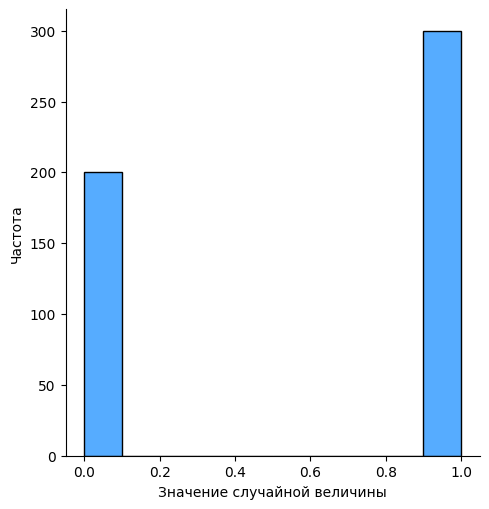

In [7]:
from scipy.stats import bernoulli
import seaborn as sns

data = bernoulli.rvs(size=500, p=0.6)
ax = sns.displot(data, kde=False, color='dodgerblue')
ax.set(xlabel='Значение случайной величины', ylabel='Частота')

Также можно вывести количество неудач и попаданий в нашей модели:

In [9]:
unique, counts = np.unique(data, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 200]
 [  1 300]]


Итак, мы получили результат, близкий к ожидаемому, но с некоторыми погрешностями, что, разумеется, является нормальным.

### Биномиальное распределение

Повторение нескольких независимых испытаний Бернулли называется процессом Бернулли. Результаты процесса Бернулли в свою очередь будут следовать биномиальному распределению.

Производитель гаджетов знает, что 20 % производимых им товаров — бракованные.

Если он производит десять изделий в день, какова вероятность того, что не более двух из них бракованные?

In [10]:
import scipy

scipy.stats.binom.pmf(8,10,0.8)+scipy.stats.binom.pmf(9,10,0.8)+scipy.stats.binom.pmf(10,10,0.8)

np.float64(0.6777995264)

Как и для распределения Бернулли, для биномиального распределения можно смоделировать какое-то количество попыток и получить результат. Например, можно смоделировать биноминальное распределение с параметром p = 0.5 и количеством испытаний, равным 10, и реализовать 1000 попыток:

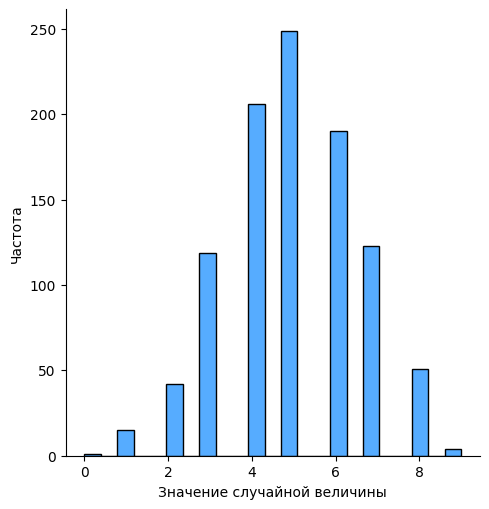

In [11]:
from numpy import random
import seaborn as sns

data = random.binomial(n=10, p=0.5, size=1000)
ax = sns.displot(data, kde=False, color='dodgerblue')
ax.set(xlabel='Значение случайной величины', ylabel='Частота')

### Распределение Пуассона

Распределение Пуассона — это дискретное распределение вероятностей числа событий, происходящих в данный период времени, с учётом среднего количества раз, когда событие происходит за этот период времени.

In [12]:
import scipy

scipy.stats.distributions.poisson.pmf(5, 4.5)

np.float64(0.17082685848611215)

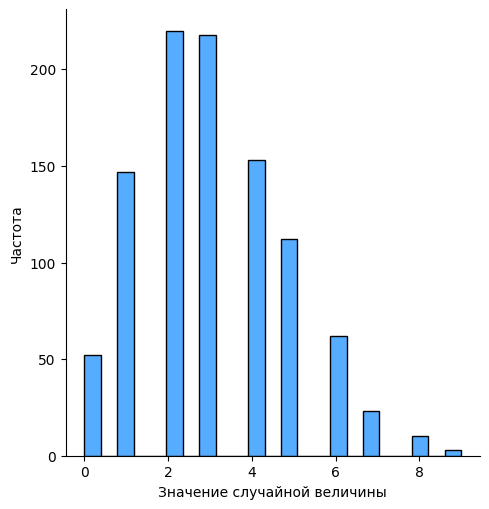

In [13]:
from numpy import random
import seaborn as sns

data = random.poisson(lam=3, size=1000)
ax = sns.displot(data, kde=False, color='dodgerblue')
ax.set(xlabel='Значение случайной величины', ylabel='Частота')

Пассажиры прибывают на вокзал со средней скоростью 4 человека в минуту.

Если количество пассажиров, приезжающих на вокзал, подчиняется распределению Пуассона, какова приблизительная вероятность того, что 16 пассажиров приедут на вокзал в конкретный четырёхминутный период? Округлите ответ до трёх знаков после точки-разделителя.

In [14]:
import math

# Параметры
lambda_value = 16
k = 16

# Расчёт вероятности
probability = (lambda_value**k * math.exp(-lambda_value)) / math.factorial(k)
print(f"Вероятность того, что 16 пассажиров приедут за 4 минуты: {probability:.3f}")


Вероятность того, что 16 пассажиров приедут за 4 минуты: 0.099


## 9. Непрерывные распределения

### Равномерное распределение

Равномерная непрерывная случайная величина используется в различных экономических моделях. Например, при выпуске в продажу нового товара для управления необходимыми запасами на складе на первых этапах используют равномерное непрерывное распределение. Это делают следующим образом: прогнозируют спрос на товар на основании различных факторов (например, по времени года, населению и т. д.) и моделируют показатель спроса равномерным распределением на первые дни и недели продажи товара.

Мы можем с помощью Python смоделировать случайную величину c таким распределением и визуализировать плотность её распределения. К примеру, сформируем выборку объёмом 10000 для распределения с параметрами

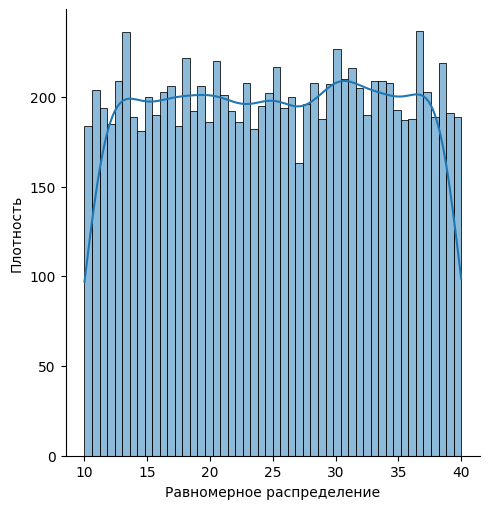

In [1]:
from scipy.stats import uniform
import seaborn as sns

data = uniform.rvs(size=10000, loc=10, scale=30)
ax = sns.displot(data, kde=True, bins=50)
ax.set(xlabel='Равномерное распределение', ylabel='Плотность')

### Нормальное распределение

Нормальное распределение (его ещё называют гауссовским или распределением Гаусса) представляет собой распределение вероятностей, обычно используемое для моделирования таких явлений, как физические характеристики (например, рост, вес и т. д.) или результаты тестирований.

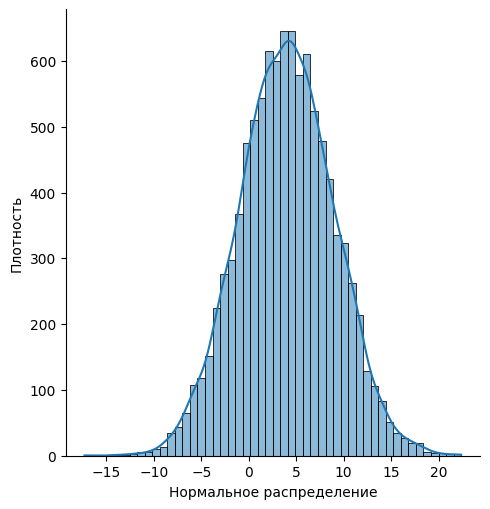

In [2]:
from scipy.stats import norm
import seaborn as sns

data = norm.rvs(size=10000, loc=4, scale=5)
ax = sns.displot(data, kde=True, bins=50)
ax.set(xlabel='Нормальное распределение', ylabel='Плотность')

С помощью Python мы можем стандартизировать данные следующим образом:

In [3]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler
data = asarray([[93, 44],
                [4, 2],
                [36, 1],
                [14, 29],
                [78, 21]])
print(data)
scaler = StandardScaler()
scaled = scaler.fit_transform(data)
print(scaled)

[[93 44]
 [ 4  2]
 [36  1]
 [14 29]
 [78 21]]
[[ 1.37243726  1.50201177]
 [-1.17229016 -1.06239857]
 [-0.25733199 -1.12345596]
 [-0.88636573  0.58615094]
 [ 0.94355062  0.09769182]]


### Экспоненциальное распределение

Экспоненциальное распределение — это распределение вероятностей времени между событиями в процессе Пуассона.

С помощью Python мы можем смоделировать экспоненциальное распределение так:

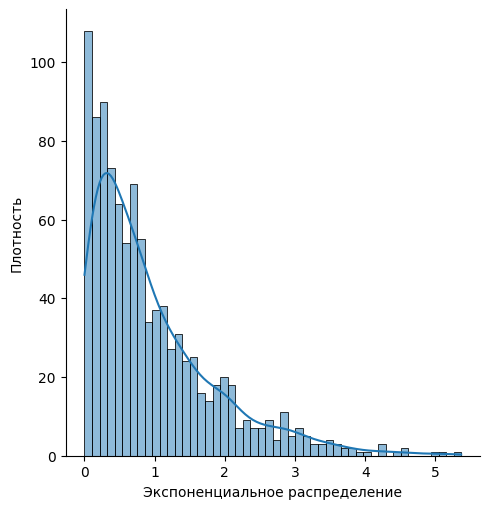

In [4]:
from scipy.stats import expon
import seaborn as sns

data = expon.rvs(scale=1, loc=0, size=1000)
ax = sns.displot(data, kde=True, bins=50)
ax.set(xlabel='Экспоненциальное распределение', ylabel='Плотность')

В среднем новый холодильник служит 10 лет. Предположим, что продолжительность времени службы распределена экспоненциально. Ответы округлите до трёх знаков после точки-разделителя. 

1. Какова вероятность того, что холодильник прослужит более 7 лет? 

2. Какова вероятность того, что устройство прослужит от 9 до 11 лет?

In [6]:
import math

# Параметры
lambda_value = 1 / 10  # Среднее время службы (10 лет), λ = 1 / ожидание
t = 7  # Время

# Вероятность
probability_more_than_7 = math.exp(-lambda_value * t)
print(f"Вероятность того, что холодильник прослужит более 7 лет: {probability_more_than_7:.3f}")

# Интервал
a = 9  # Начало интервала
b = 11  # Конец интервала

# Вероятности
probability_from_9_to_11 = math.exp(-lambda_value * a) - math.exp(-lambda_value * b)
print(f"Вероятность, что устройство прослужит от 9 до 11 лет: {probability_from_9_to_11:.3f}")


Вероятность того, что холодильник прослужит более 7 лет: 0.497
Вероятность, что устройство прослужит от 9 до 11 лет: 0.074
